In [1]:
import torch

In [2]:
a=torch.tensor(3.,)

In [3]:
a

tensor(3.)

In [4]:
b=torch.tensor(4.,requires_grad=True)

In [5]:
b

tensor(4., requires_grad=True)

In [6]:
b.shape 

torch.Size([])

In [7]:
c=b

In [8]:
c.backward()

In [9]:
torch.sin(b)

tensor(-0.7568, grad_fn=<SinBackward0>)

In [10]:
x= torch.tensor(3.)
w=torch.tensor(4.0,requires_grad=True)
b=torch.tensor(5.,requires_grad=True)
x,w,b

(tensor(3.), tensor(4., requires_grad=True), tensor(5., requires_grad=True))

In [11]:
y=w*x+b
y

tensor(17., grad_fn=<AddBackward0>)

In [12]:
y.backward()

In [13]:
print('dy/dx:',x.grad)
print('dy/dw:',w.grad)
print('dy/db:',b.grad)






dy/dx: None
dy/dw: tensor(3.)
dy/db: tensor(1.)


In [14]:
import torch
import torchvision
from torchvision.datasets import MNIST

/usr/local/lib/python3.8/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.8/dist-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [15]:
dataset = MNIST(root='data/',download=True)

In [16]:
len(dataset)

60000

In [17]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

In [18]:
test_dataset=MNIST(root = 'data/',train=False)
len(test_dataset)

10000

In [19]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

labels: 5


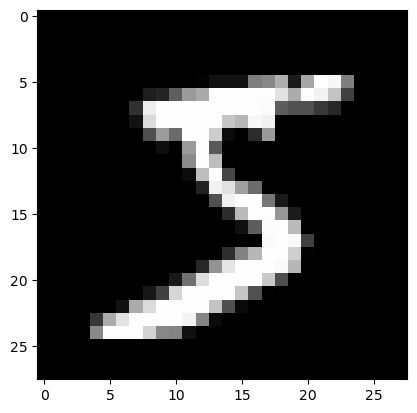

In [21]:
image,label=dataset[0]
plt.imshow(image,cmap='gray')
print('labels:',label)

labels: 3


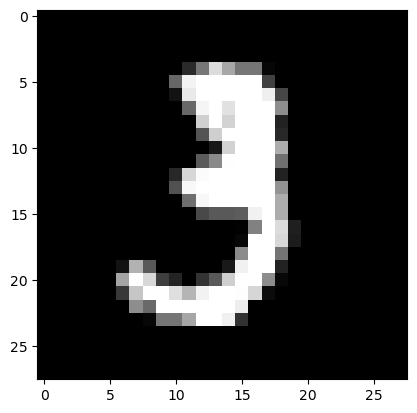

In [22]:
image,label=dataset[10]
plt.imshow(image,cmap='gray')
print('labels:',label)

In [23]:
import torchvision.transforms as  transforms

In [24]:
dataset=MNIST(root='data/',train=True,
              transform=transforms.ToTensor())

In [25]:
image_tensor,label=dataset[0]

In [26]:
print(image_tensor.shape,label)

torch.Size([1, 28, 28]) 5


In [27]:
print(image_tensor[0,10:15,10:15])
print(torch.max(image_tensor),torch.min(image_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


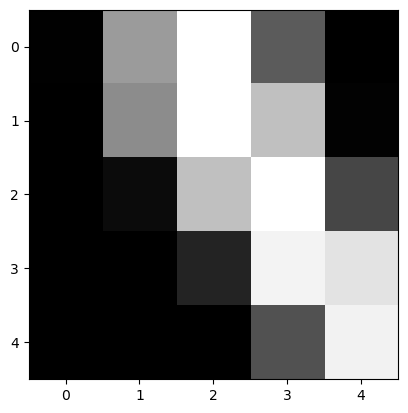

In [28]:
plt.imshow(image_tensor[0,10:15,10:15],cmap='gray');

In [29]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [30]:
from torch.utils.data import DataLoader
batch_size=16
train_loader=DataLoader(train_ds,batch_size,shuffle=True)
val_loader=DataLoader(val_ds)
print(val_loader)

In [31]:
import torch.nn as nn
input_size=28*28
num_classes=10
model=nn.Linear(input_size,num_classes)



In [32]:
print(model.weight.shape)
model.weight


torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0174, -0.0326, -0.0286,  ...,  0.0318,  0.0068, -0.0048],
        [-0.0206,  0.0085,  0.0303,  ...,  0.0296,  0.0298,  0.0174],
        [ 0.0086,  0.0352,  0.0288,  ..., -0.0152,  0.0319,  0.0078],
        ...,
        [-0.0140,  0.0055,  0.0319,  ...,  0.0152,  0.0136, -0.0107],
        [ 0.0204,  0.0080, -0.0273,  ...,  0.0198, -0.0254,  0.0136],
        [-0.0103,  0.0260, -0.0096,  ...,  0.0062,  0.0314, -0.0147]],
       requires_grad=True)

In [33]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0114,  0.0119, -0.0256, -0.0236,  0.0262,  0.0250, -0.0060,  0.0043,
         0.0276, -0.0303], requires_grad=True)

In [34]:
for images,label in train_loader:
    print(label)
    print(images.shape)
    #outputs=model(images)
    break

tensor([5, 1, 0, 3, 9, 7, 7, 0, 7, 6, 0, 3, 2, 2, 1, 7])
torch.Size([16, 1, 28, 28])


In [35]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(input_size,num_classes)


    def forward(self,xb):
        xb=xb.reshape(-1,784)
        out=self.linear(xb)
        return out

model=MnistModel()

In [36]:
print(model.linear.weight.shape,model.linear.bias.shape)
list (model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-7.3717e-03, -5.9763e-03, -7.7226e-03,  ...,  3.1167e-02,
          -6.8630e-03,  1.0404e-02],
         [ 5.4077e-03, -4.5263e-03, -1.9108e-02,  ..., -2.8078e-02,
          -1.9167e-02,  1.8599e-02],
         [-8.7288e-03, -2.5816e-02, -8.3390e-03,  ..., -1.5796e-02,
           1.7695e-03,  2.8693e-02],
         ...,
         [ 4.1212e-06, -1.6930e-03,  1.9959e-02,  ...,  2.7060e-03,
           1.5460e-02, -1.2419e-02],
         [-1.5896e-02, -3.2173e-02, -3.5636e-03,  ...,  6.0064e-05,
           1.7187e-02,  2.6569e-02],
         [ 4.3651e-04, -2.3291e-02,  3.2130e-02,  ...,  9.7182e-03,
           2.7269e-03,  2.1253e-02]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0078, -0.0093,  0.0031,  0.0077, -0.0009, -0.0297,  0.0232,  0.0130,
         -0.0119,  0.0033], requires_grad=True)]

In [37]:
for images,label in train_loader:
    print(images.shape)
    outputs=model(images)
    break
print('output.shape : ',outputs.shape)
print('sample output : \n',outputs[:2].data)



torch.Size([16, 1, 28, 28])
output.shape :  torch.Size([16, 10])
sample output : 
 tensor([[ 0.0773, -0.1674,  0.1349,  0.2775,  0.0527,  0.0020,  0.0383,  0.1281,
         -0.2468,  0.2582],
        [ 0.1116,  0.0655, -0.1838,  0.3163, -0.0236, -0.1641,  0.2130, -0.2153,
         -0.2328, -0.0113]])


In [38]:
exps=torch.exp(outputs[0])

In [39]:
exps

tensor([1.0804, 0.8459, 1.1444, 1.3198, 1.0541, 1.0020, 1.0391, 1.1366, 0.7813,
        1.2946], grad_fn=<ExpBackward0>)

In [40]:
probability=exps/torch.sum(exps)

In [41]:
probability

tensor([0.1010, 0.0791, 0.1070, 0.1234, 0.0985, 0.0937, 0.0971, 0.1062, 0.0730,
        0.1210], grad_fn=<DivBackward0>)

In [42]:
import torch.nn.functional as F


In [43]:
probs=F.softmax(outputs,dim=1)
print('sample probabilities : \n',probs[:2].data)
print('sum=',torch.sum(probs[0]).item())

sample probabilities : 
 tensor([[0.1010, 0.0791, 0.1070, 0.1234, 0.0985, 0.0937, 0.0971, 0.1062, 0.0730,
         0.1210],
        [0.1114, 0.1063, 0.0829, 0.1367, 0.0973, 0.0845, 0.1232, 0.0803, 0.0789,
         0.0985]])
sum= 1.0


In [44]:
max_probs,preds=torch.max(probs,dim=1)
print(max_probs)
print(preds)



tensor([0.1234, 0.1367, 0.1328, 0.1171, 0.1278, 0.1448, 0.1710, 0.1113, 0.1155,
        0.1227, 0.1322, 0.1261, 0.1434, 0.1299, 0.1433, 0.1268],
       grad_fn=<MaxBackward0>)
tensor([3, 3, 4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 3, 3])


In [45]:
label

tensor([5, 9, 4, 7, 0, 6, 3, 1, 1, 8, 7, 9, 4, 8, 2, 4])

In [46]:
def accuracy(ouputs,labels):
    _,preds=torch.max(outputs,dim=1)
    return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [47]:
accuracy(outputs,label)

tensor(0.1250)

In [48]:
loss_fn = F.cross_entropy

In [49]:
loss=loss_fn(outputs,label)
print(loss)

tensor(2.2492, grad_fn=<NllLossBackward0>)


In [50]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()




In [51]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs,lr , model, train_loadeer ,val_loader,opt_fun=torch.optim.SGD):
    history=[]
    optimizer=opt_fun(model.parameters(),lr)
    for epoch in range(epochs):
        for batch in train_loader:
            loss=model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        result=evaluate(model,val_loader)
        model.epoch_end(epoch,result)
        history.append(result)
    return history

In [52]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3298816680908203, 'val_acc': 0.10289374738931656}

In [ ]:
history= fit(5,0.0001,model,train_loader,val_loader)

Epoch [0], val_loss: 2.0279, val_acc: 0.1029


In [ ]:
import torch 
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline


In [ ]:
dataset =MNIST(root='data/',
               download = True,
               transform=ToTensor())

In [ ]:
val_size=10000
train_size=len(dataset)-val_size
train_ds,val_ds=random_split(dataset,[train_size,val_size])
len(train_ds),len(val_ds)

In [ ]:
batch_size=128

In [ ]:
train_loader=DataLoader(train_ds,batch_size,shuffle=True,num_workers=4,pin_memory=True)
val_loader=DataLoader(val_ds,batch_size*2,num_workers=4,pin_memory=True)
print(train_loader.batch_size)



In [ ]:
for (images,labels) in (train_loader):
    print('images shape',images.shape)
    plt.figure(figsize=(16,9))
    plt.axis('off')
    plt.imshow(make_grid(images,nrow=16).permute(1,2,0))
    break

In [ ]:
def accuracy(outputs,labels):
    _,preds=torch.max(outputs,dim=1)
    return torch.tensor(torch.sum(preds==labels).item()/ len(preds))

In [ ]:
class MnistModel(nn.Module):
    def __init__(self,in_size,hidden_size,out_size):
        super().__init__()
        self.linear1=nn.Linear(in_size,hidden_size)
        self.linear2=nn.Linear(hidden_size,out_size)
    def forward(self,xb):
        xb=xb.view(xb.size(0),-1)
        out=self.linear1(xb)
        out=F.relu(out)
        out=self.linear2(out)
        return out
    def training_step(self,batch):
        images,labels=batch
        out=self(images)
        loss=F.cross_entropy(out,labels)
        return loss
    def validation_step(self,batch):
        images,labels=batch
        out=self(images)
        loss=F.cross_entropy(out,labels)
        acc = accuracy(out,labels)
        return {'val_loss':loss,'val_acc':acc}

    def validation_epoch_end(self,outputs):
            batch_losses=[x['val_loss'] for x in outputs]
            epoch_loss=torch.stack(batch_losses).mean()
            batch_accs=[x['val_acc'] for x in outputs]
            epoch_acc=torch.stack(batch_accs).mean()
            return {'val_loss':epoch_loss.item(),'val_acc':epoch_acc.item()}
    def epoch_end(self,epoch,result):
        print("epoch[{}] ,val_loss:{:.4f},val_acc:{:.4f}".format(epoch,result['val_loss'],result['val_acc']))

In [ ]:
input_size=784
hidden_size=32
num_classes=10


In [ ]:
model=MnistModel(input_size,hidden_size,out_size=num_classes)
model

In [ ]:
for t in model.parameters():
    print(t.shape)

In [ ]:
for images,labels in train_loader:
    outputs=model(images)
    loss=F.cross_entropy(outputs,labels)
    print('loss',loss.item())
    break
print('output shape',outputs.shape)
print('sample output:\n',outputs[:2].data)

In [ ]:
torch.cuda.is_available()

In [ ]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [ ]:
device=get_default_device()
device

In [ ]:
def to_device(data,device):
    if isinstance(data,(list,tuple)):
        return [to_device(x,device) for x in data]
    return data.to(device,non_blocking=True)
    

In [ ]:
for images,labels in train_loader:
    print(images.shape)
    images=to_device(images,device)
    print(images.device)
    print(images)
    break

In [ ]:
class DeviceDataLoader():
    def __init__(self,dl,device):
        self.dl=dl
        self.device=device
    def __iter__(self):
         for b in self.dl:
             yield to_device(b,self.device)
             
    def __len__(self):
         return len(self.dl)

In [ ]:
train_loader=DeviceDataLoader(train_loader,device)
val_loader=DeviceDataLoader(val_loader,device)

In [ ]:
for xb,yb in val_loader:
    print('xb.device:',xb.device)
    print('yb:',yb)
    break

In [ ]:
def evaluate(model,val_loader):
    outputs=[model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)
def fit(epochs,lr,model,train_loader,val_loader,opt_func=torch.optim.SGD):
    history=[]
    optimizer=opt_func(model.parameters(),lr)
    for epoch in range(epochs):
        for batch in train_loader:
            loss=model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        result=evaluate(model,val_loader)
        model.epoch_end(epoch,result)
        history.append(result)
    return history

In [ ]:
model=MnistModel(input_size,hidden_size=hidden_size,out_size=num_classes)
to_device(model,device)

In [ ]:
history=[evaluate(model,val_loader)]
history

In [ ]:
history+=fit(5,0.5,model,train_loader,val_loader)

In [ ]:
history=[evaluate(model,val_loader)]
history

In [1]:
import os 
import torch 
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

/usr/local/lib/python3.8/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.8/dist-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
project_name='cifar10'

In [3]:
dataset_url="https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url,'.')

Using downloaded and verified file: ./cifar10.tgz


In [4]:
with tarfile.open('./cifar10.tgz','r:gz') as tar:
    tar.extractall(path='./data')

In [5]:
data_dir='data/cifar10'
print(os.listdir(data_dir))

['train', 'test']


In [6]:
classess=os.listdir(data_dir+'/train')
print(classess)

['frog', 'ship', 'horse', 'cat', 'dog', 'airplane', 'deer', 'truck', 'bird', 'automobile']


In [7]:
 airplane_file=os.listdir(data_dir+'/train/airplane/')
print("number of training examples of airplane",len(airplane_file))
print(airplane_file[:5])

number of training examples of airplane 5000
['2699.png', '3093.png', '2890.png', '4060.png', '2146.png']


In [8]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [9]:
dataset=ImageFolder(data_dir+'/train',transform=ToTensor())

In [10]:
len(dataset)

50000

In [11]:
type(dataset)

torchvision.datasets.folder.ImageFolder

In [12]:
img,label=dataset[0]
print(img.shape,label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235,  ..., 0.8235, 0.8157, 0.

In [13]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
def show_example(img,label):
    print('label',dataset.classes[label],"("+str(label)+")")
    plt.imshow(img.permute(1,2,0))

label bird (2)


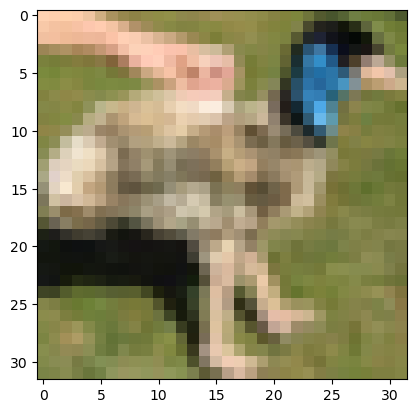

In [15]:
show_example(*dataset[10099])

In [16]:
random_seed=42
torch.manual_seed(random_seed)

In [17]:
val_size=5000
train_size=len(dataset)-val_size
train_ds,val_ds=random_split(dataset,[train_size,val_size])
len(train_ds),len(val_ds)

(45000, 5000)

In [18]:
from torch.utils.data import DataLoader
batch_size=1024

In [19]:
train_dl=DataLoader(train_ds,batch_size,shuffle=True,num_workers=4,pin_memory=True)
val_dl=DataLoader(val_ds,batch_size*2,num_workers=4,pin_memory=True)

In [20]:
from torchvision.utils import make_grid

def show_batches(dl):
    for images,labels in dl:
        fig,ax=plt.subplots(figsize=(12,6))
        ax.set_xticks([]);ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        break




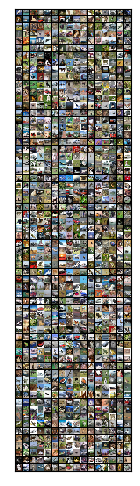

In [21]:
show_batches(train_dl)

In [22]:
def apply_kernel(image,kernel):
    ri,ci=image.shape
    rk,ck=kernel.shape
    ro,co=ri-rk+1,ci-ck+1
    output=torch.zeros([ro,co])
    for i in range(ro):
        for j in range(co):
            output[i,j]=torch.sum(image[i:i+rk,j:j+ck]*kernel)
    return output

In [23]:
sample_image=torch.tensor([
    [3,3,3,3,3],
    [1,1,1,1,1],
    [2,2,2,2,2],
    [0,0,0,0,0],
    [1,2,3,0,1]
],dtype=torch.float32)


sample_kernel=torch.tensor([
    [1,0,2],
    [2,0,1],
    [1,2,0]
],dtype=torch.float32)




In [24]:
apply_kernel(sample_image,sample_kernel)

tensor([[18., 18., 18.],
        [ 9.,  9.,  9.],
        [11., 14.,  9.]])

In [25]:
import torch.nn as nn
import torch.nn.functional as F

In [26]:
simple_model=nn.Sequential(
    nn.Conv2d(3,8,kernel_size=3,stride=1,padding=1),
    nn.MaxPool2d(2,2)
)

In [27]:
simple_model

Sequential(
  (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [28]:
for images,label in train_dl:
    print('images shape',images.shape)
    out=simple_model(images)
    print('out shape',out.shape)
    break

images shape torch.Size([1024, 3, 32, 32])
out shape torch.Size([1024, 8, 16, 16])


In [29]:
def accuracy(ouputs,labels):
    _,preds=torch.max(outputs,dim=1)
    return torch.tensor(torch.sum(preds==labels).item()/len(preds))


In [30]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))



    

In [31]:



class Cifar10CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10))
        
    def forward(self, xb):
        return self.network(xb)

    

In [32]:
model=Cifar10CnnModel()
print(model)

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

In [33]:
model

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

In [34]:
for images,labels in train_dl:
    print('images.shape:',images.shape)
    out=model(images)
    print('out_shape:',out.shape)
    print('out[0]:',out[0])
    break

images.shape: torch.Size([1024, 3, 32, 32])
out_shape: torch.Size([1024, 10])
out[0]: tensor([ 0.0239, -0.0466,  0.0067,  0.0193,  0.0044, -0.0598, -0.0188, -0.0242,
         0.0431, -0.0164], grad_fn=<SelectBackward0>)


In [35]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
def to_device(data,device):
    if isinstance(data,(list,tuple)):
        return [to_device(x,device) for x in data]
    return data.to(device,non_blocking=True)


class DeviceLoader():
    def __init__(self,dl,device):
        self.dl=dl
        self.device=device
    def __iter__(self):
        for b in self.dl:
            yield to_device(b,self.device)
        

In [36]:
device=get_default_device()

In [37]:
device

device(type='cuda')

In [38]:
train_dl=DeviceLoader(train_dl,device)
val_dl=DeviceLoader(val_dl,device)

In [39]:
to_device(model,device)

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

In [40]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history
    

In [41]:
model=to_device(Cifar10CnnModel(),device)

In [42]:
evaluate(model,train_dl)

{'val_loss': 2.302900552749634, 'val_acc': 0.10004427284002304}

In [43]:
num_epochs=10
opt_func=torch.optim.Adam
lr=0.001

In [ ]:
history=fit(num_epochs,lr,model,train_dl,val_dl,opt_func)

Epoch [0], train_loss: 2.1042, val_loss: 1.9069, val_acc: 0.2934
Epoch [1], train_loss: 1.7612, val_loss: 1.9876, val_acc: 0.3107
Epoch [2], train_loss: 1.5916, val_loss: 1.4679, val_acc: 0.4601
Epoch [3], train_loss: 1.4061, val_loss: 1.3609, val_acc: 0.5019
Epoch [4], train_loss: 1.2574, val_loss: 1.2916, val_acc: 0.5265
Epoch [5], train_loss: 1.1444, val_loss: 1.1302, val_acc: 0.5916
Epoch [6], train_loss: 1.0513, val_loss: 1.0281, val_acc: 0.6330
Epoch [7], train_loss: 0.9448, val_loss: 0.9893, val_acc: 0.6507


In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

In [ ]:
plot_accuracies(history)

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

In [ ]:
plot_losses(history)

In [ ]:
test_dataset = ImageFolder(data_dir+'/test', transform=ToTensor())

In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

In [ ]:
img, label = test_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))